### Load packages

In [183]:
import sys
sys.path.append('~/MAP-CF/')  # path that contains cf_search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, json, io, os
import importlib
import cf_search.visualize
importlib.reload(cf_search.visualize)

# Now re-import your function
from cf_search.visualize import plot_cf_kde_cell


from cf_search.visualize import (
    extract_cell_data,
    plot_single_pca,
    plot_fitness_heatmap,
    plot_all_pcas_grid,
    plot_all_pcas_grid_by_cluster,
    plot_all_clusters_by_heatmap,
    plot_all_mutable_clusters_by_heatmap,
    plot_cf_clustermap_cell,
    plot_cf_umap_cell,
    plot_cf_umap_cell_clusters,
    plot_cf_eta2_bar_cell,
    plot_cf_meanvalue_heatmap_cell,
    plot_cf_kde_cell,
    plot_cellwise_grid,
    plot_cf_meanvalue_heatmap_constraints_cell,
    plot_cf_eta2_bar_constraints_cell,
    eta2_bar_constraints_cell_pca_kmeans,
    eta2_bar_cell_pca_kmeans,
    tree_constraints_to_cluster_cell_pca_kmeans,
    tree_constraints_to_hclust_cell,
    correlation_heatmap_cell,
    correlation_mutable_vs_constraint_cell
)


### Load data

In [191]:
# Update paths accordingly
output_dir = "synthetic/mlp_cf"
archive_path = f'{output_dir}/counterfactuals.pkl'
feature_json_path = 'synthetic/synthetic_feature_categories_action.json'

with open(archive_path, 'rb') as f:
    archive_data = pickle.load(f)

with open(feature_json_path, 'r') as f:
    feature_categories = json.load(f)

category_labels = list(feature_categories.keys())
num_categories = len(category_labels)

cell_feature_sets = {
    (i, j): feature_categories[category_labels[i]] + (feature_categories[category_labels[j]] if i != j else [])
    for i in range(num_categories)
    for j in range(num_categories)
}


### View data for a specific cell

In [192]:
i, j = 0, 0  # Change as needed
cell_df = extract_cell_data(archive_data, (i, j))

print(f"Found {len(cell_df)} counterfactuals in cell ({i}, {j})")
print(cell_df['E1'].value_counts())


Found 100 counterfactuals in cell (0, 0)
 2.238992    34
-1.046072    20
-2.527346    18
-2.238704    10
-1.869692     5
-2.492302     3
-2.467885     3
-0.314696     2
-1.429270     1
 2.129716     1
-2.011469     1
-1.969466     1
 0.020716     1
Name: E1, dtype: int64


### Grid plots

#### UMAP

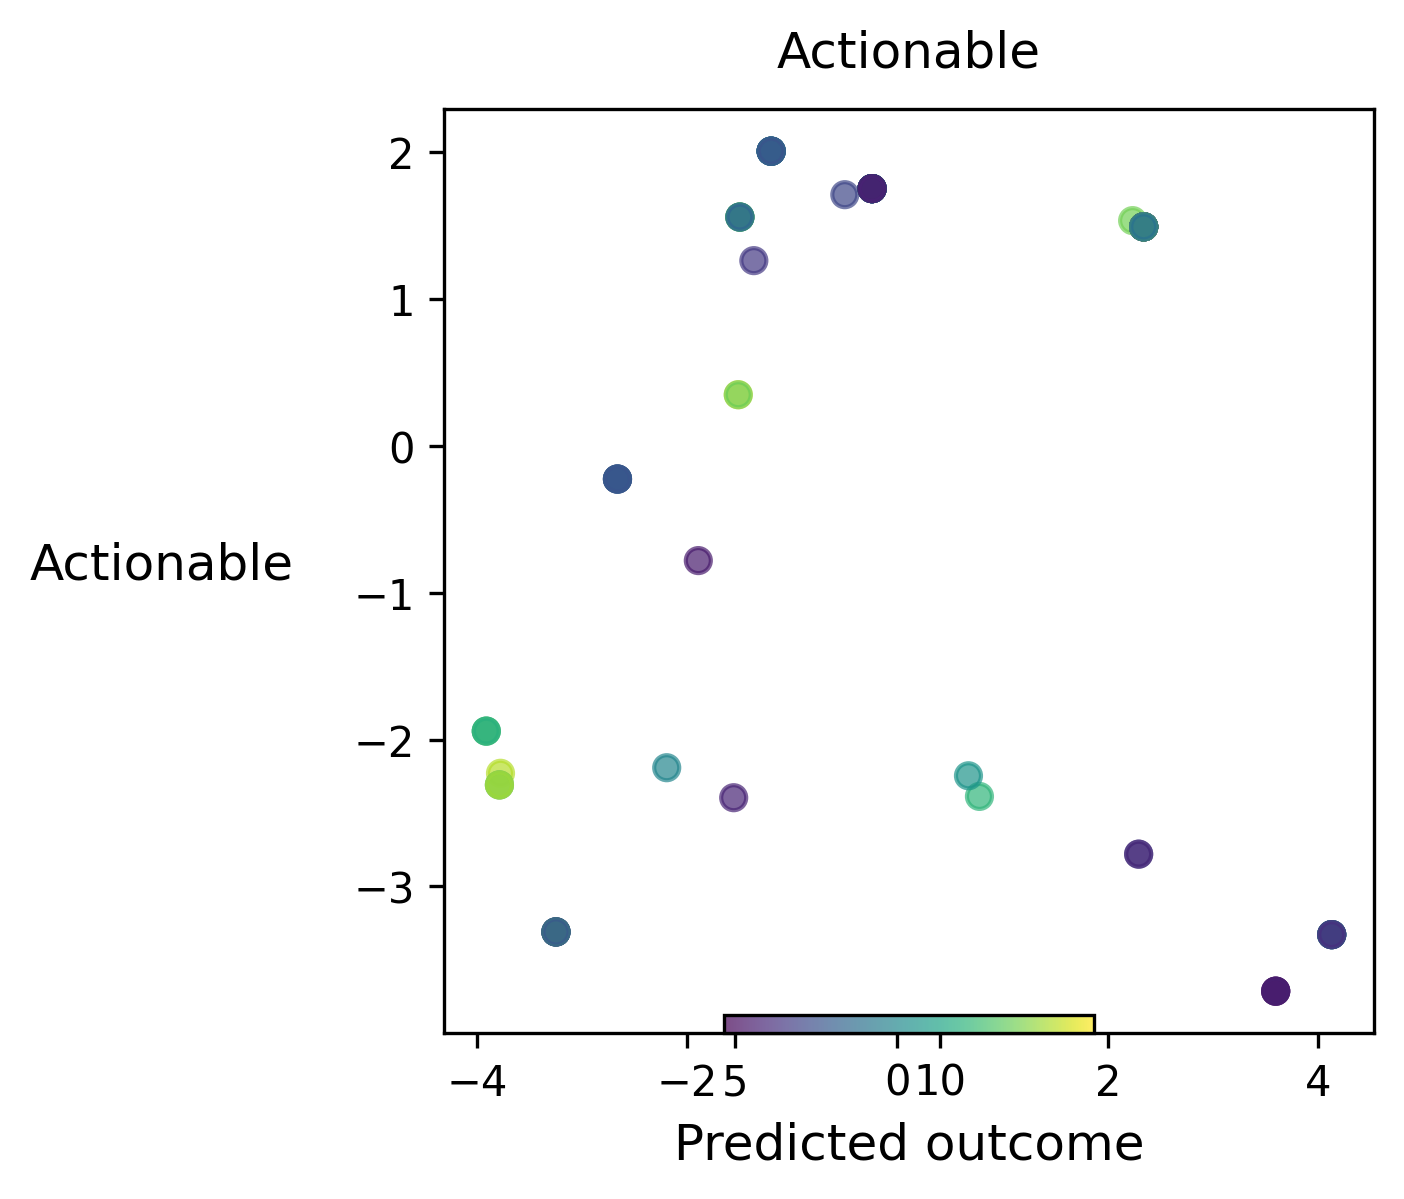

In [193]:
ref_df = pd.read_csv("synthetic/synthetic_test.csv")  # Optional reference individuals
color_feature = "fitness"  # or "predicted_fitness", or column from ref_df

# Optional: add ref_df values into archive_data
'''
for key, df in archive_data.items():
    if key < len(ref_df):
        archive_data[key][color_feature] = ref_df.iloc[key][color_feature]
'''
# Compute global vmin/vmax
all_vals = []
for cell_key in cell_feature_sets:
    df = extract_cell_data(archive_data, cell_key)
    if color_feature in df.columns:
        all_vals.extend(df[color_feature].dropna().tolist())

vmin, vmax = min(all_vals), max(all_vals)

fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    plot_single_pca,
    plot_type_name="PCA of Counterfactuals",
    color_feature=color_feature,
    global_vmin=vmin,
    global_vmax=vmax
)
plt.show()


#### Eta bar plots

/global/home/hpc5434/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/global/home/hpc5434/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


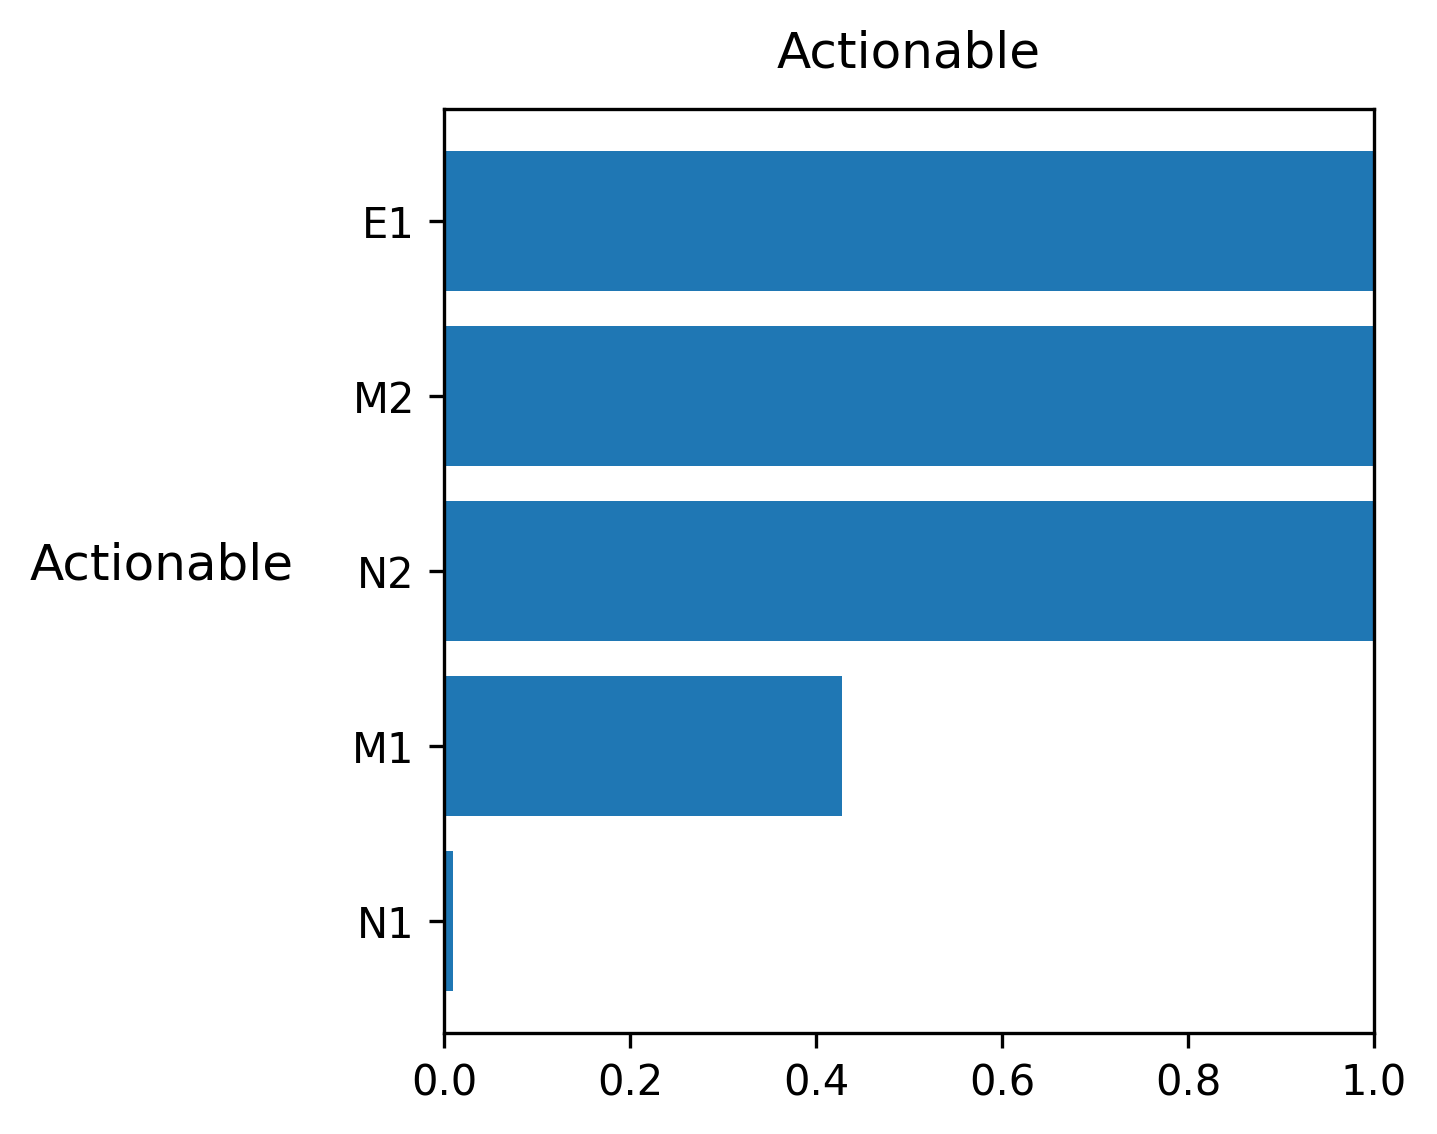

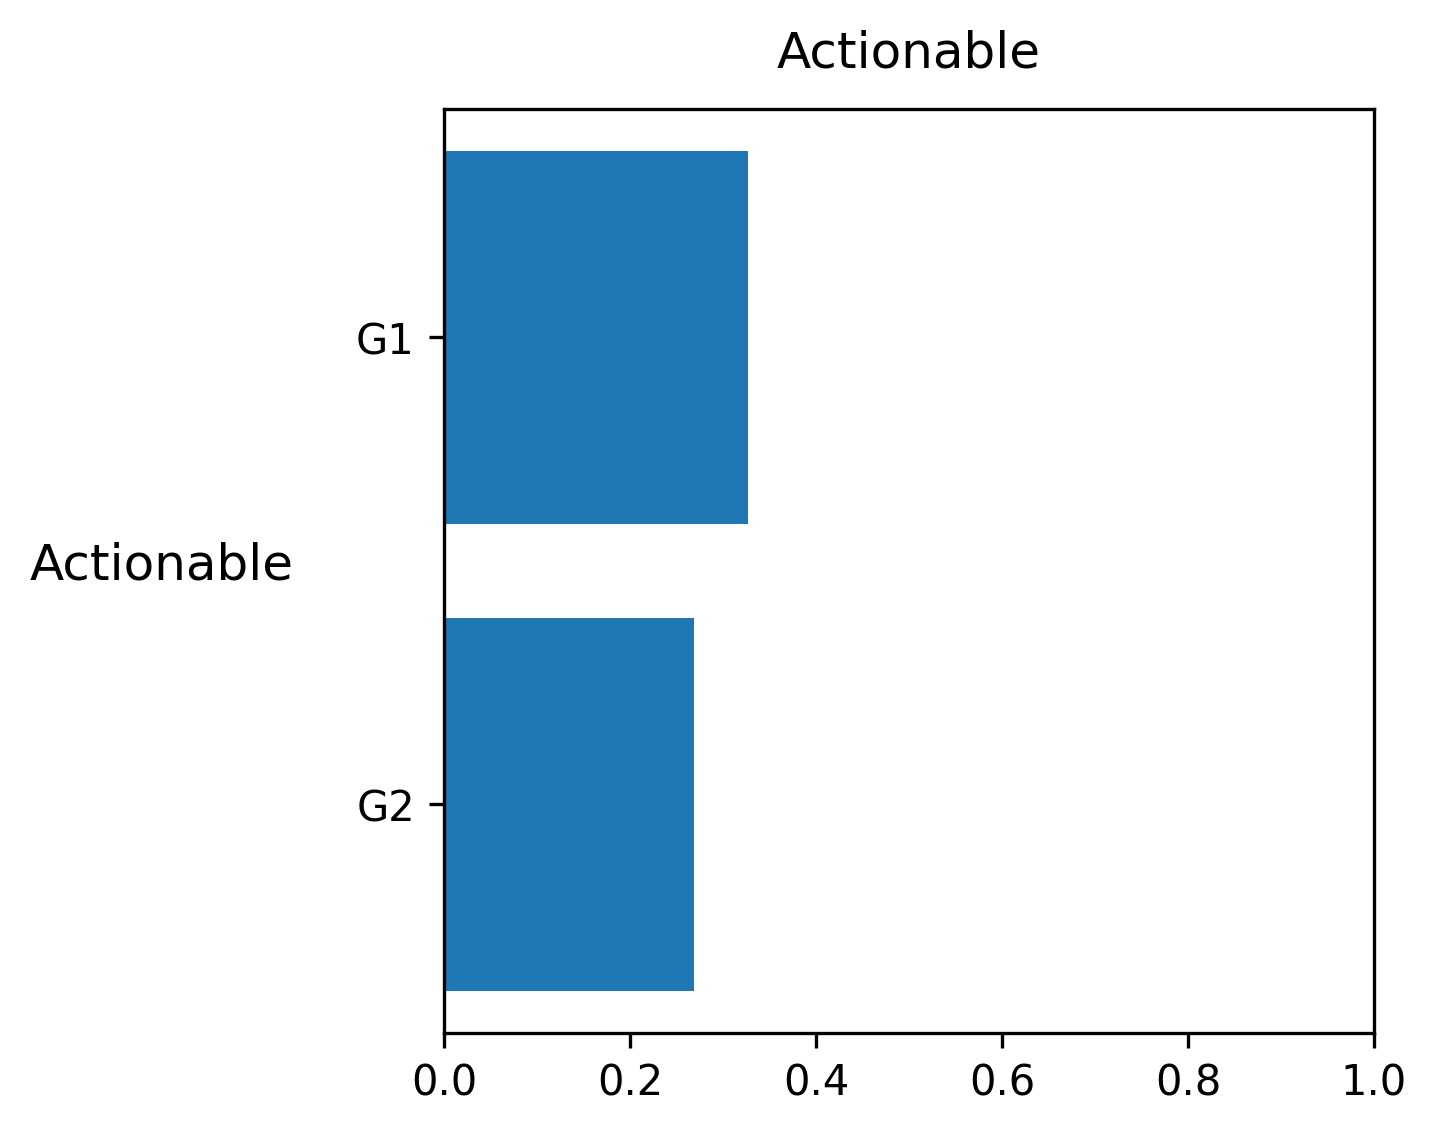

In [19]:
fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    eta2_bar_cell_pca_kmeans,
    plot_type_name="η² for Mutable Features"
)
plt.show()

fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    eta2_bar_constraints_cell_pca_kmeans,
    plot_type_name="η² for Constraint Features"
)
plt.show()


#### Heatmap of means

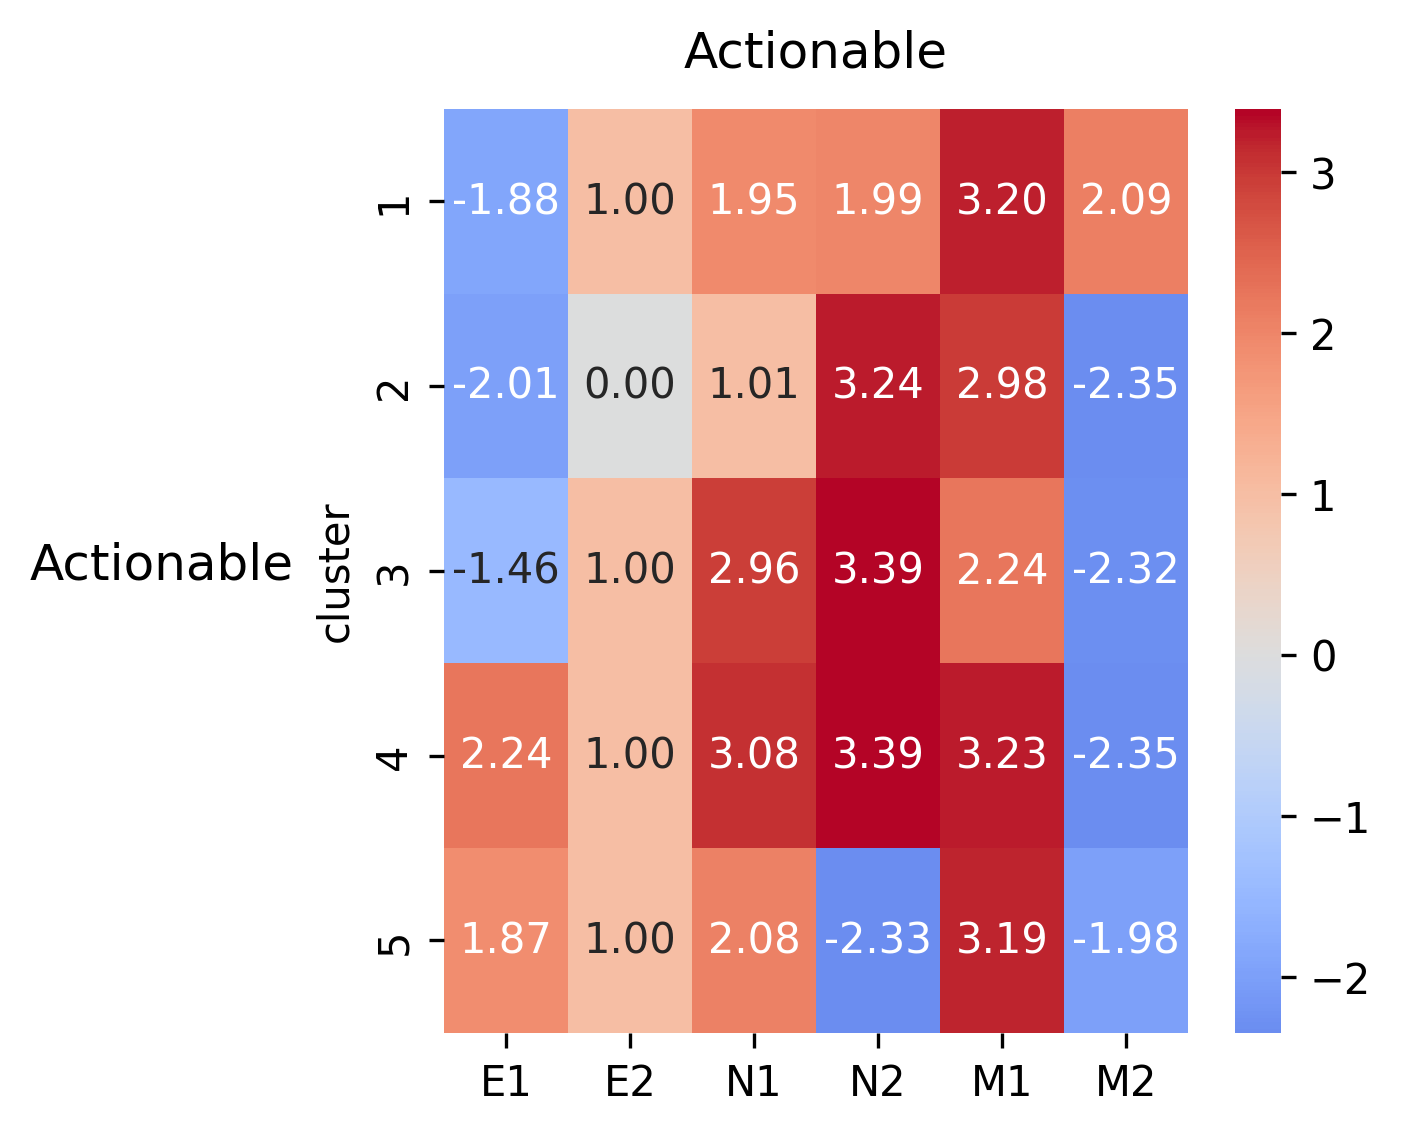

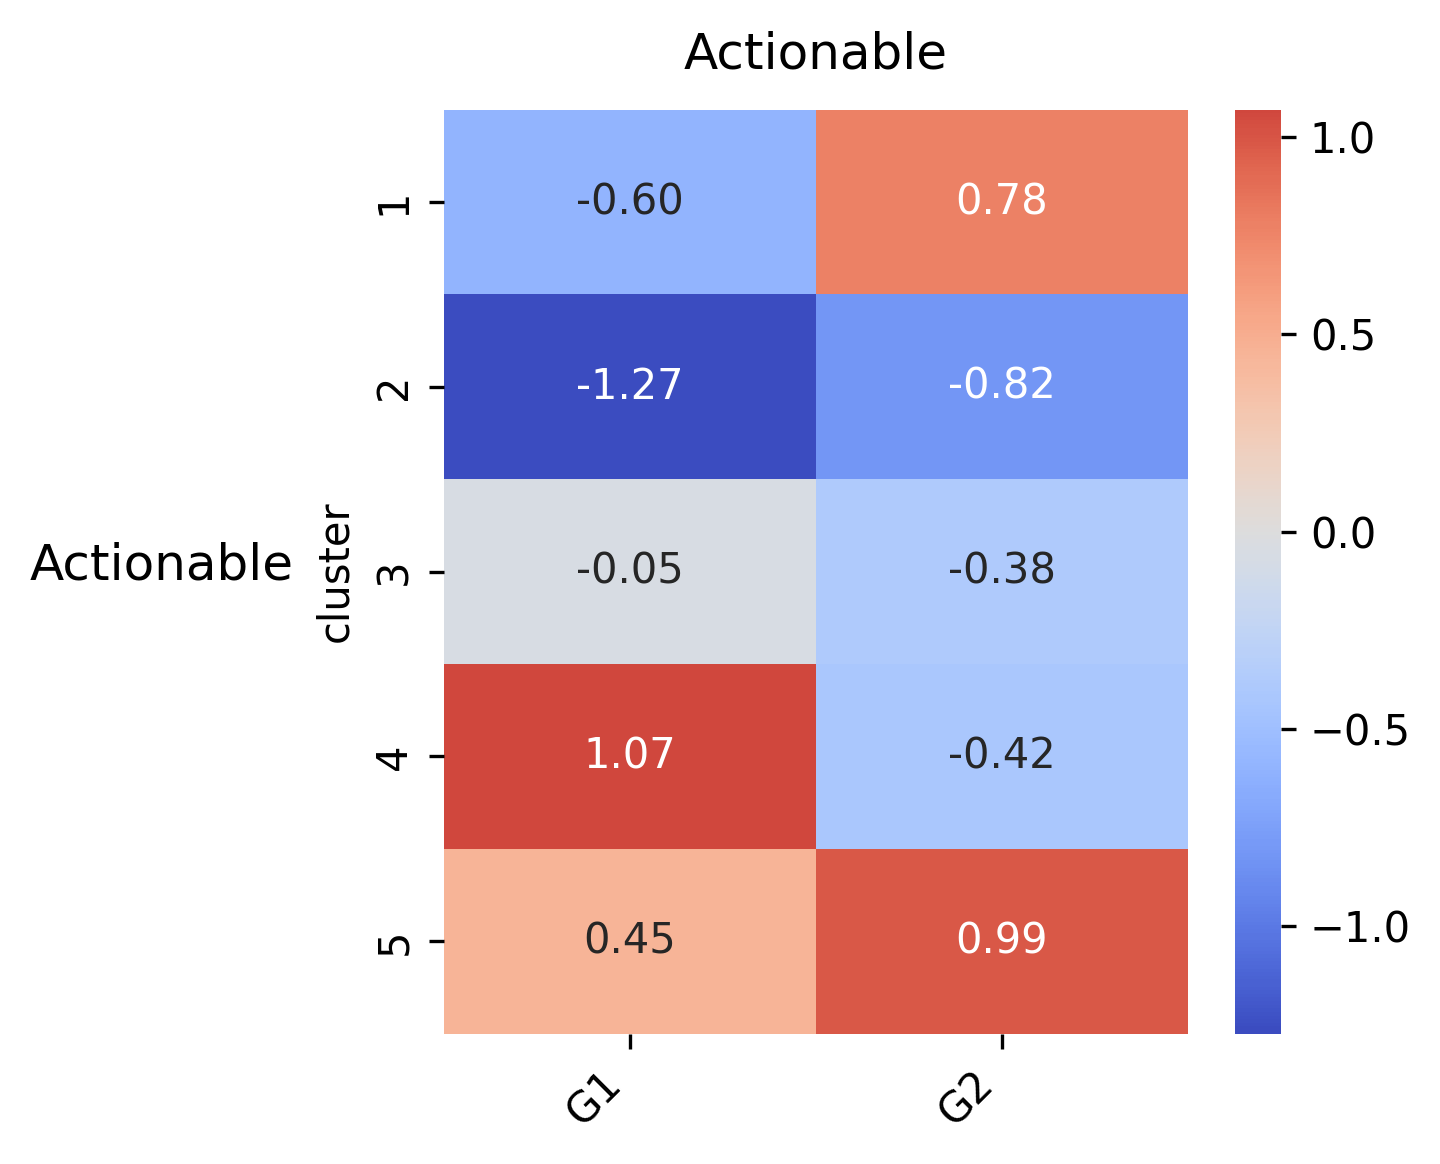

In [195]:
fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    plot_cf_meanvalue_heatmap_cell,
    plot_type_name="Mean Values per Cluster (Mutable)",
    max_k=5  # or any other number of clusters you'd like to use
)
plt.show()


fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    plot_cf_meanvalue_heatmap_constraints_cell,
    plot_type_name="Mean Values per Cluster (Constraint)",
    max_k=5
)
plt.show()


#### KDE plots

[Cell (0, 0)] Skipping Cluster 2 due to low variance: 0.00e+00
[Cell (0, 0)] Skipping Cluster 4 due to low variance: 2.08e-31
Y max after plotting: 5.249860053813744


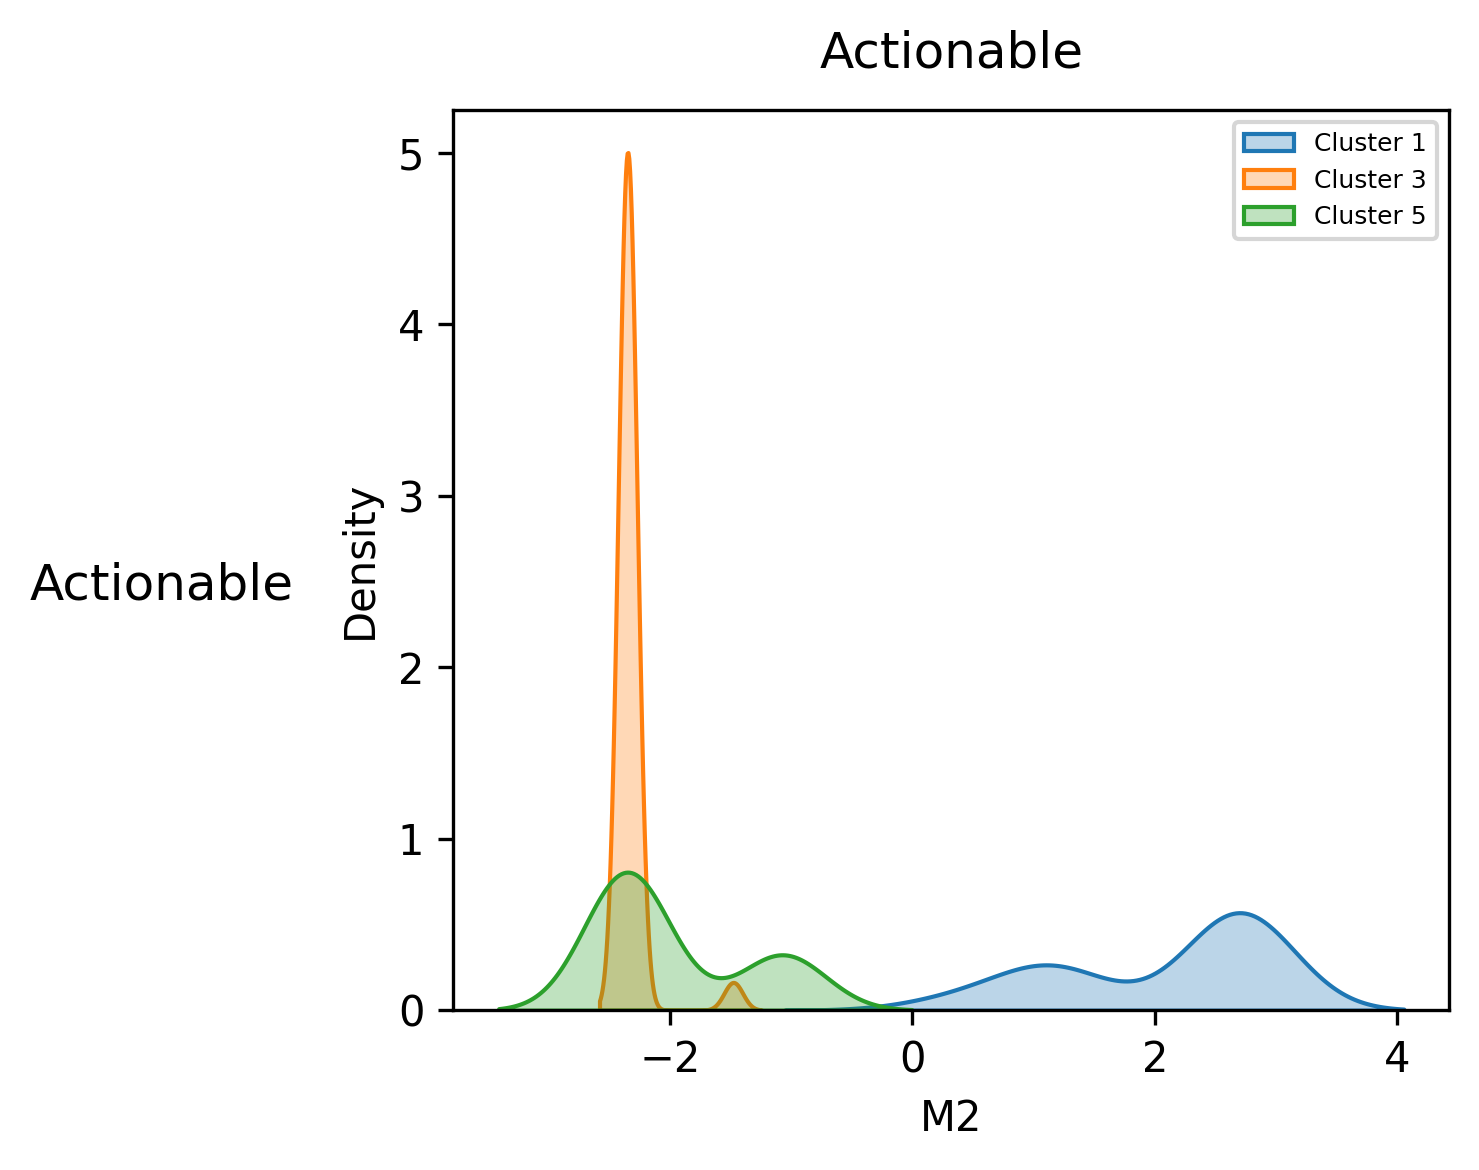

In [194]:
feature_to_plot = "M2"

fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    plot_cf_kde_cell,
    plot_type_name=f"KDE of {feature_to_plot}",
    feature=feature_to_plot
)
plt.tight_layout()
plt.show()



In [ ]:
print(plot_cf_kde_cell.__code__.co_varnames)


('ax', 'df', 'cell_key', 'mutable_features', 'feature', 'features_for_clustering', 'X', 'scaler', 'X_scaled', 'k', 'labels', 'Z', 'c')


Y max after plotting: 5.0


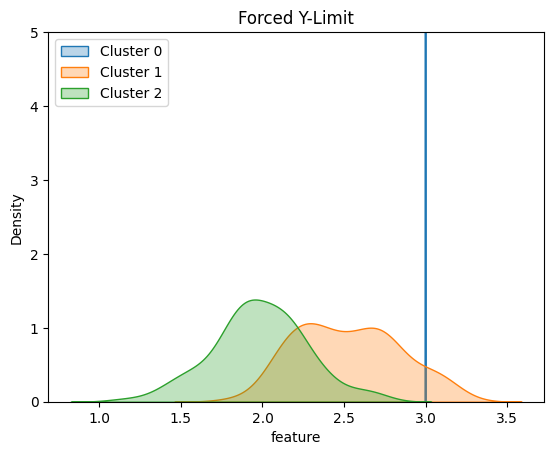

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Fake clustered data
np.random.seed(0)
cluster_data = {
    'cluster': [0]*100 + [1]*100 + [2]*100,
    'feature': (
        np.random.normal(3.0, 0.001, 100).tolist() +  # Narrow spike
        np.random.normal(2.5, 0.3, 100).tolist() +    # Wide bump
        np.random.normal(2.0, 0.3, 100).tolist()      # Wide bump
    )
}
df = pd.DataFrame(cluster_data)

# Plotting
fig, ax = plt.subplots()

for c in df['cluster'].unique():
    subset = df[df['cluster'] == c]['feature']
    sns.kdeplot(subset, label=f'Cluster {c}', fill=True, ax=ax, alpha=0.3, common_norm=False)

ax.set_ylim(0, 5)  # ✅ force y-axis limit
ax.set_title("Forced Y-Limit")
print("Y max after plotting:", ax.get_ylim()[1])
ax.legend()
plt.show()


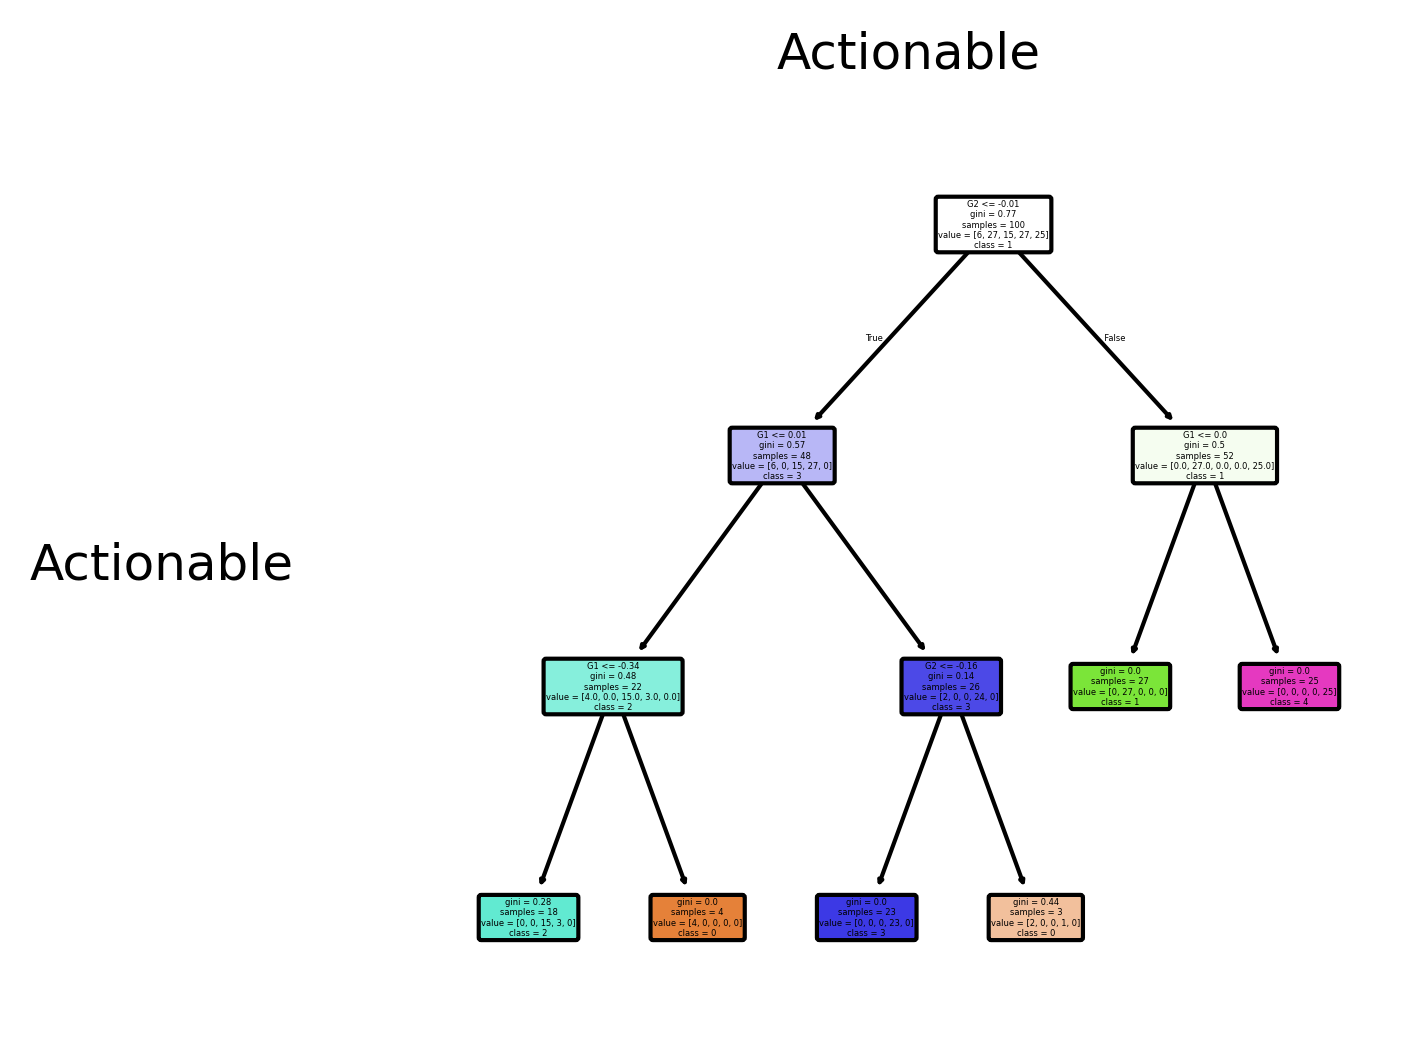

In [ ]:
fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    tree_constraints_to_cluster_cell_pca_kmeans,
    plot_type_name="Decision Trees (Constraints → Cluster)"
)
plt.show()


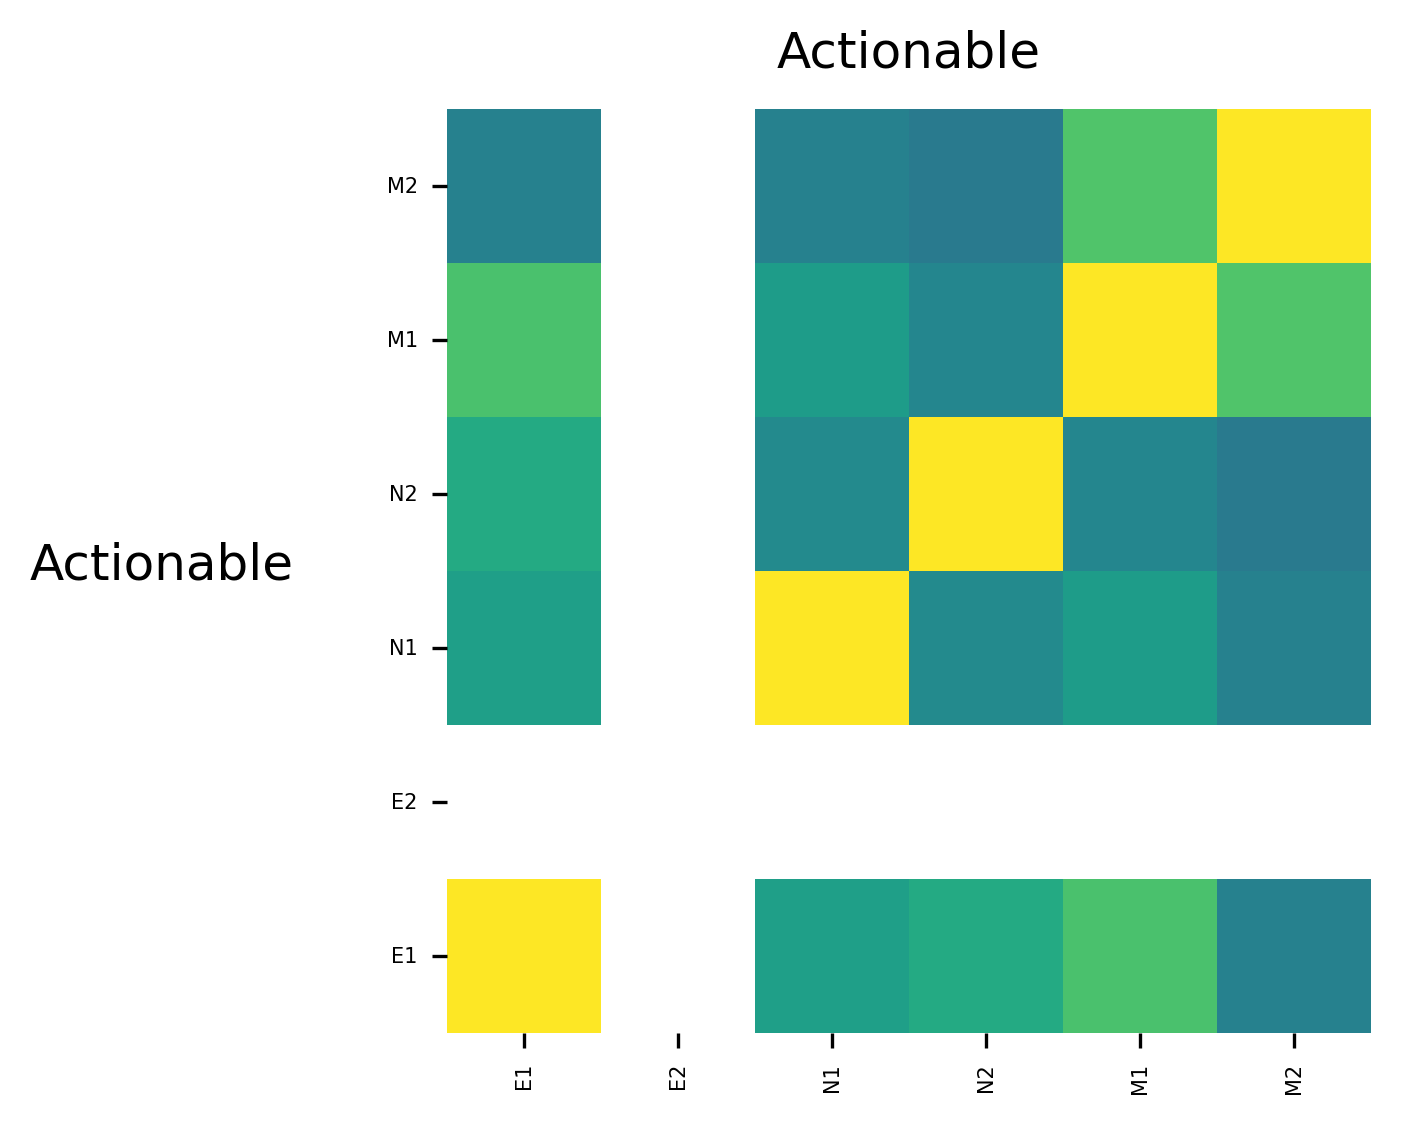

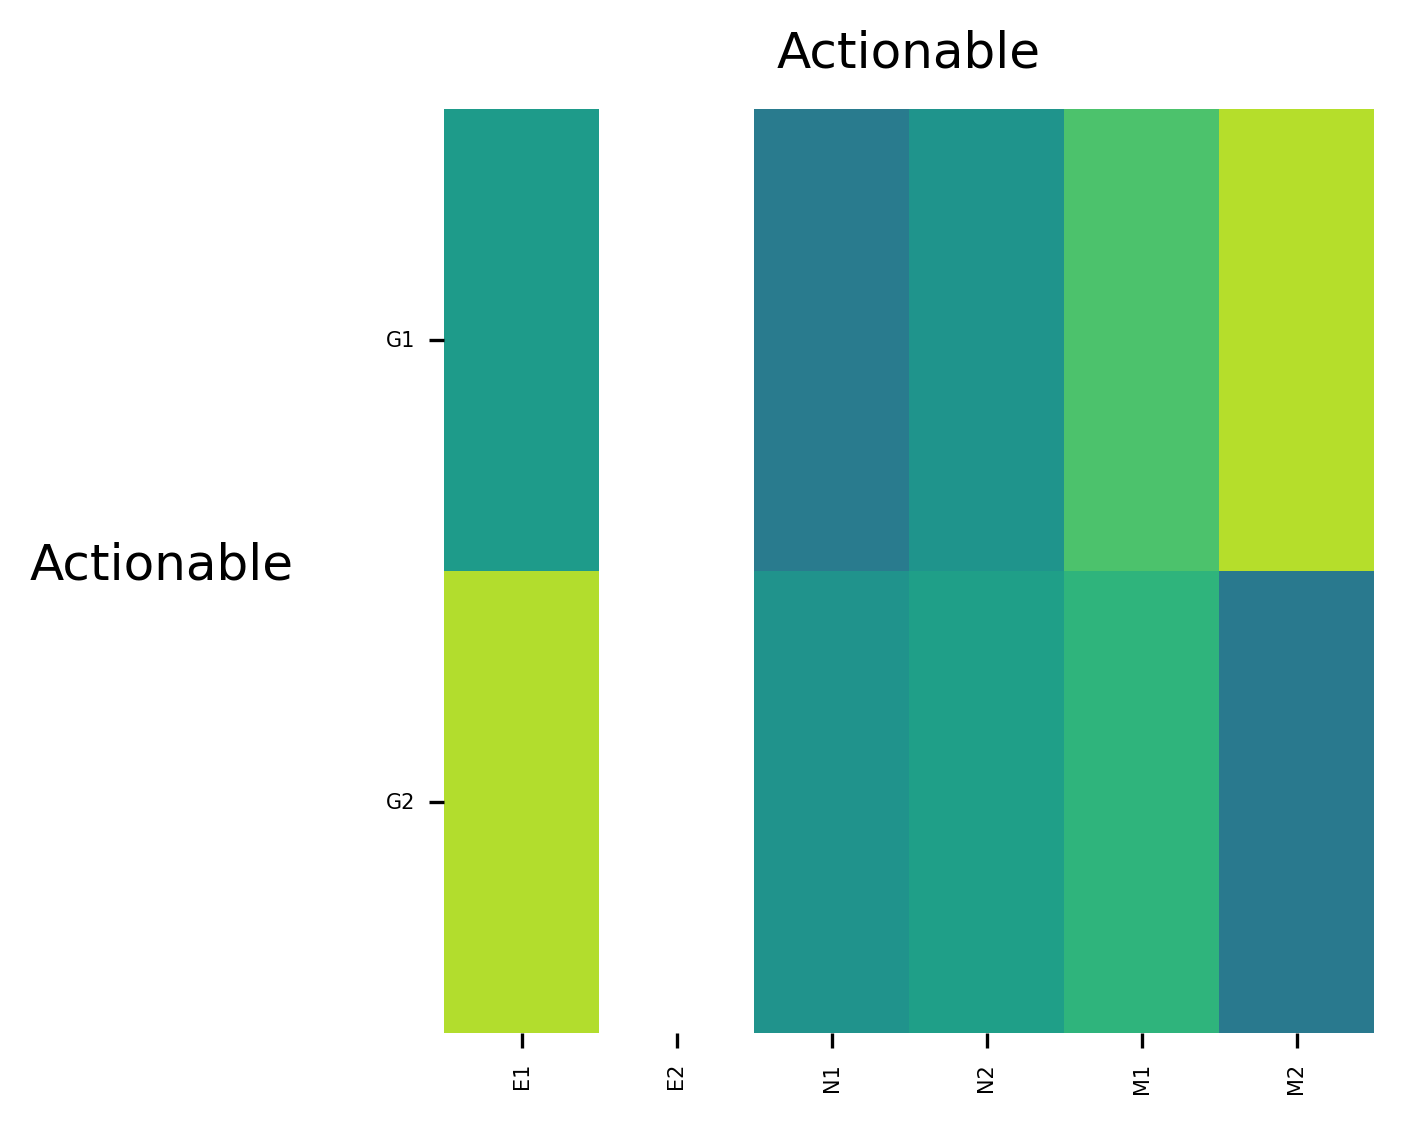

In [ ]:
fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    correlation_heatmap_cell,
    plot_type_name="Feature Correlation Heatmaps"
)
plt.show()

fig = plot_cellwise_grid(
    archive_data,
    cell_feature_sets,
    feature_categories,
    correlation_mutable_vs_constraint_cell,
    plot_type_name="Mutable vs Constraint Correlation"
)
plt.show()
